In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def sample_formula(n, k, C):
    # not used
    deg = 2 ** k // math.e
    formula = []
    for i in range(C):
        clause = []
        next_vars = np.random.choice(np.arange(1, n+1), k, replace=False)
        for v in next_vars:
            if np.random.randint(2):
                clause.append(v)
            else:
                clause.append(-v)
        formula.append(clause)
    return formula
    

In [3]:
f = sample_formula(50, 5, 20)
f

[[-3, -38, -44, -18, -50],
 [-8, -13, 10, -50, 11],
 [-18, -5, 1, 47, -19],
 [21, -45, -42, 49, 37],
 [18, -9, -33, -17, 44],
 [33, 38, 34, 20, -4],
 [-47, -50, 44, -19, 40],
 [42, -14, 34, -26, -20],
 [16, -4, 15, 10, 6],
 [-35, 10, -14, -13, 8],
 [14, -42, -38, 15, 23],
 [-50, 32, 33, 5, -25],
 [45, 20, -44, -3, 7],
 [34, -35, -21, -19, -30],
 [11, 6, 35, 23, -10],
 [8, -46, -21, -35, -49],
 [38, -6, 45, -5, -10],
 [-33, -3, -9, 41, -36],
 [19, 22, 28, 7, -24],
 [31, 40, 4, -9, -30]]

In [4]:
def is_satisfied_ene(clause, assignment):
    num_satisfied = 0
    for v in clause:
        true_v = abs(v)
        pos = v > 0
        assgn = assignment[true_v - 1]
        if pos and assgn: num_satisfied += 1
        elif not pos and not assgn: num_satisfied += 1
    if num_satisfied == 0 or num_satisfied == len(clause):
        return False
    else: return True

In [5]:
def find_unsatisfied(f, assign):
    for clause in f:
        if not is_satisfied_ene(clause, assign):
            return clause
    return None

In [6]:
# use Moser-Tardos algorithm to sample an assignment
def sample_satisfying_assignment(f, n):
    assgn = np.random.choice(2, n)
    unsatisfied_clause = True
    while unsatisfied_clause:
        unsatisfied_clause = find_unsatisfied(f, assgn)
        if unsatisfied_clause:
            vbls = [abs(v) for v in unsatisfied_clause]
            for v in vbls:
                assgn[v - 1] = np.random.choice(2)
    return assgn

In [7]:
sample_satisfying_assignment(f, 50)

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [8]:
def sample_N_assignments(f, n, N):
    assignments = np.empty((N, n), dtype='int64')
    for i in range(N):
        assignments[i] = sample_satisfying_assignment(f, n)
    return assignments


In [16]:
assgns = sample_N_assignments(f, 50, 10000)

In [30]:
num_set_to_one = assgns.sum(axis=1)
mu = np.mean(num_set_to_one)
v = np.std(num_set_to_one)
mu, v

(25.0064, 3.531141322575465)

In [31]:
norm_hist = np.round(np.random.normal(mu, v, 10000))

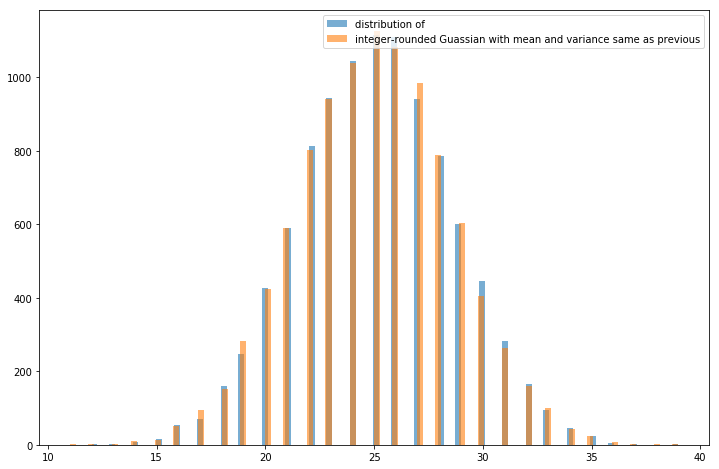

In [39]:
plt.figure(figsize=(12, 8))
plt.hist(num_assigned, alpha=0.6, bins=100, label='distribution of ')
plt.hist(norm_hist, alpha=0.6, bins=100, label='integer-rounded Guassian with mean and variance same as previous')
plt.legend()
plt.show()

In [14]:
# compute a matrix of distances in variables for formula
def distances(f, n):
    d = np.zeros((n, n), dtype='int64') + len(f)
    d1 = d.copy()
    return d

In [15]:
distances(f, 10)

array([[20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20]])